<a href="https://colab.research.google.com/github/fernandajofili/NetflixAnalysis/blob/main/NetflixAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisar QUANTO e QUANDO assisti a Dark.

A partir dos dados de filmes e séries assistidos na Netflix, é possível fazer diversas análises.

A minha proposta é descobrir quanto tempo eu, Fernanda (perfil "Nanda" da Netflix), passei assistindo a série alemã Dark. Também ver em quais dias da semana e em que horas eu assisti.

As análises e passos são descritos ao longo deste notebook.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df_geral = pd.read_csv('/content/drive/My Drive/Data Science/Netflix Data/Content_Interaction/ViewingActivity.csv')

In [ ]:
df_geral.shape

(32007, 10)

In [ ]:
df_geral.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Antonio,2020-11-11 00:32:25,00:20:55,NaN,Jornada nas Estrelas: Deep Space Nine: Tempora...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:20:55,00:20:55,BR (Brazil)
1,Antonio,2020-11-11 00:13:43,00:18:34,NaN,Jornada nas Estrelas: Deep Space Nine: Tempora...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:44:46,00:44:46,BR (Brazil)
2,Jô,2020-11-10 18:38:51,00:15:49,Autoplayed: user action: None;,Seoul Searching,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:15:49,00:15:49,BR (Brazil)
3,Jô,2020-11-10 18:37:52,00:00:04,Autoplayed: user action: None;,Temporada 1 (Vídeo extra): DASH & LILY,TRAILER,Samsung 2017 Kant-M UHD TV Smart TV,00:00:04,00:00:04,BR (Brazil)
4,Jô,2020-11-10 18:36:59,00:00:41,Autoplayed: user action: None;,Kingdom: Season 1 (Hook 2),HOOK,Samsung 2017 Kant-M UHD TV Smart TV,00:00:41,00:00:41,BR (Brazil)


## Filtrando apenas para dados assistidos no Perfil = Nanda.

E passar esse filtro para a variável **df**

In [ ]:
is_fernanda = df_geral['Profile Name'] == 'Nanda'
print(is_fernanda.head())

0    False
1    False
2    False
3    False
4    False
Name: Profile Name, dtype: bool


In [ ]:
df = df_geral[is_fernanda]
# print(df.head())
df.shape

(6710, 10)

## Agora que já temos um DF do perfil "Nanda", dropamos as colunas que não são importantes.

Para esta análise, não precisaremos das colunas:
- Profile Name
- Attributes
- Supplemental Video Type
- Device Type
- Bookmark
- Latest Bookmark
- Country

In [ ]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head()

,Start Time,Duration,Title
82,2020-11-06 01:38:50,00:00:36,Temporada 1 (Clipe 2): Emily em Paris
95,2020-11-05 23:07:54,02:18:09,O Diabo de Cada Dia
96,2020-11-05 23:07:01,00:00:17,The Conjuring_hook_primary_16x9
97,2020-11-05 23:06:56,00:00:04,The Good Place: Temporada 4 (Trailer)
101,2020-11-04 20:48:10,00:21:42,Modern Family: Temporada 10: Aniversários (Epi...


## Convertendo strings em Datetiem e Timedelta com Pandas

Os dados fornecidos pela Netflix estão em UTC timezone. Precisamos converter para minha hora local (UTC/GMT-3).

Primeiro checo o tipo de dados de cada coluna do dataframe:

In [ ]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

### Como estão todos em strings (object), teremos que fazer os seguintes passos para as colunas de tempo:

 Converter **Start Time** para datetime, num formato que pandas possa entender e fazer cálculos
2) Converter **Start Time** de UTC para GMT-3
3) Converter **Duration** para timdelta, um formato de duração que pandas possa entender e fazer cálculos

In [ ]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

### Para encontrar o parâmetro da timezone

Acessar: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones

Para **Recife**: America/Recife

### Só podemos usar .tz_convert() em DatetimeIndex

Para isso, precisamos definir a coluna **Start Time** como index, usando **set_index()** antes da conversão.
Para retornar para coluna normal depois da conversão, usamos **reset_index()**

In [ ]:
# Muda a coluna "Start Time" para dataframe index (passa a ser um índice)
df = df.set_index('Start Time')

# Converte a hora de UTC para GMT-3
df.index = df.index.tz_convert('America/Recife')

# Reseta "Start Time" para coluna de volta
df = df.reset_index()

# Check se funcionou
df.head()

,Start Time,Duration,Title
0,2020-11-05 22:38:50-03:00,00:00:36,Temporada 1 (Clipe 2): Emily em Paris
1,2020-11-05 20:07:54-03:00,02:18:09,O Diabo de Cada Dia
2,2020-11-05 20:07:01-03:00,00:00:17,The Conjuring_hook_primary_16x9
3,2020-11-05 20:06:56-03:00,00:00:04,The Good Place: Temporada 4 (Trailer)
4,2020-11-04 17:48:10-03:00,00:21:42,Modern Family: Temporada 10: Aniversários (Epi...


### Tratamento da coluna 'Duration'

Como é uma variação de tempo, converteremos para um Timedelta - medida de tempo que Pandas entende.

In [ ]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, America/Recife]
Duration                     timedelta64[ns]
Title                                 object
dtype: object

## Filtros de string para encontrar '**Dark**'.

Para fácil manipulação, criarei um dataframe **dark** que só terá linhas onde o título contém "**Dark**".

In [ ]:
dark = df[df['Title'].str.contains('Dark', regex=False)]
dark.shape

(145, 10)

### Checando algumas amostras da seleção
Podemos checar 10, 20 amostras para ver se a seleção deu certo e a amostra **dark** traz apenas registros onde o título tem 'Dark'.

In [ ]:
dark.sample(20)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
3608,Nanda,2020-05-16 04:04:55,00:07:52,Autoplayed: user action: None;,Dark: Temporada 2: Fantasmas (Episódio 3),NaN,Chrome PC (Cadmium),00:07:57,Not latest view,BR (Brazil)
8526,Nanda,2019-06-22 08:15:11,00:54:13,NaN,Dark: Temporada 2: Diabo Branco (Episódio 7),NaN,Netflix Windows App - Cadmium Windows Mobile,00:54:46,Not latest view,BR (Brazil)
2298,Nanda,2020-06-27 13:20:01,00:55:56,Autoplayed: user action: None;,Dark: Temporada 3: Os sobreviventes (Episódio 2),NaN,Chrome PC (Cadmium),00:55:22,00:55:22,BR (Brazil)
2291,Nanda,2020-06-27 21:50:24,01:08:55,NaN,Dark: Temporada 3: O paraíso (Episódio 8),NaN,Chrome PC (Cadmium),01:08:20,01:08:20,BR (Brazil)
8950,Nanda,2019-05-28 21:00:08,00:19:15,NaN,Dark: Temporada 1: Você colhe o que planta (Ep...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:47:35,Not latest view,BR (Brazil)
7468,Nanda,2019-08-21 12:46:46,00:54:04,Autoplayed: user action: None;,Dark: Temporada 1: Alfa e ômega (Episódio 10),NaN,Netflix Windows App - Cadmium Windows Mobile,00:54:04,Not latest view,BR (Brazil)
3100,Nanda,2020-05-30 20:02:01,00:44:54,NaN,Dark: Temporada 1: Vidas duplas (Episódio 4),NaN,Chrome PC (Cadmium),00:45:00,00:45:00,BR (Brazil)
8541,Nanda,2019-06-21 19:43:11,00:53:09,NaN,Dark: Temporada 2: Matéria escura (Episódio 2),NaN,Netflix Windows App - Cadmium Windows Mobile,00:51:29,Not latest view,BR (Brazil)
2299,Nanda,2020-06-27 12:19:11,00:57:48,NaN,Dark: Temporada 3: Déjà-vu (Episódio 1),NaN,Chrome PC (Cadmium),00:57:28,00:57:28,BR (Brazil)
9280,Nanda,2019-05-08 05:53:21,00:46:54,NaN,Dark: Temporada 1: Assim foi criado o mundo (E...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:47:59,Not latest view,BR (Brazil)


In [ ]:
dark.shape

(145, 3)

## Filtrando durações curtas

A Netflix tem a opção de auto-play na página inicial que aparece no nosso dataframe e que não representa verdadeiramente um episódio assistido.

Aqui podemos estabelecer um tempo mínimo para considerar que um episódio foi assistido **ou** podemos apenas desconsiderar os auto-plays, que duram menos de **1 minuto**. Usando esta última opção, teremos:

In [ ]:
dark = dark[(dark['Duration'] > '0 days 00:01:00')]
dark.shape

(128, 3)

## Análise dos dados

Analisando o dataframe **dark** já podemos responder algumas perguntas:

### Quanto tempo passei assistindo Dark?

In [ ]:
dark['Duration'].sum()

Timedelta('3 days 00:29:25')

### Quando assisti Dark?

Essa pergunta pode ser analisada e respondida de amis de uma forma:

a) Quais dias da semana mais assisti episódios de Dark?
b) A que horas do dia começo a assistir Dark?

Podemos criar novas colunas para analisar. **Weekday** e **hour**. Assim podemos usar métodos na coluna **Start Time** e obter as informações das perguntas acima.

In [ ]:
dark['weekday'] = dark['Start Time'].dt.weekday
dark['hour'] = dark['Start Time'].dt.hour

# Check se as colunas foram adicionadas corretamente
dark.head()

,Start Time,Duration,Title,weekday,hour
373,2020-06-27 18:50:24-03:00,0 days 01:08:55,Dark: Temporada 3: O paraíso (Episódio 8),5,18
374,2020-06-27 17:26:49-03:00,0 days 01:05:13,Dark: Temporada 3: Entretempo (Episódio 7),5,17
375,2020-06-27 16:20:50-03:00,0 days 00:52:49,Dark: Temporada 3: Luz e sombra (Episódio 6),5,16
376,2020-06-27 15:10:04-03:00,0 days 00:58:19,Dark: Temporada 3: Vida e morte (Episódio 5),5,15
377,2020-06-27 14:14:50-03:00,0 days 00:51:54,Dark: Temporada 3: A origem (Episódio 4),5,14


## Visualizando os dados

Podemos usar matplotlib para visualizar os dados. Por exemplo, meu hábito de assistir Dark durante a semana.


In [ ]:
%matplotlib inline
import matplotlib

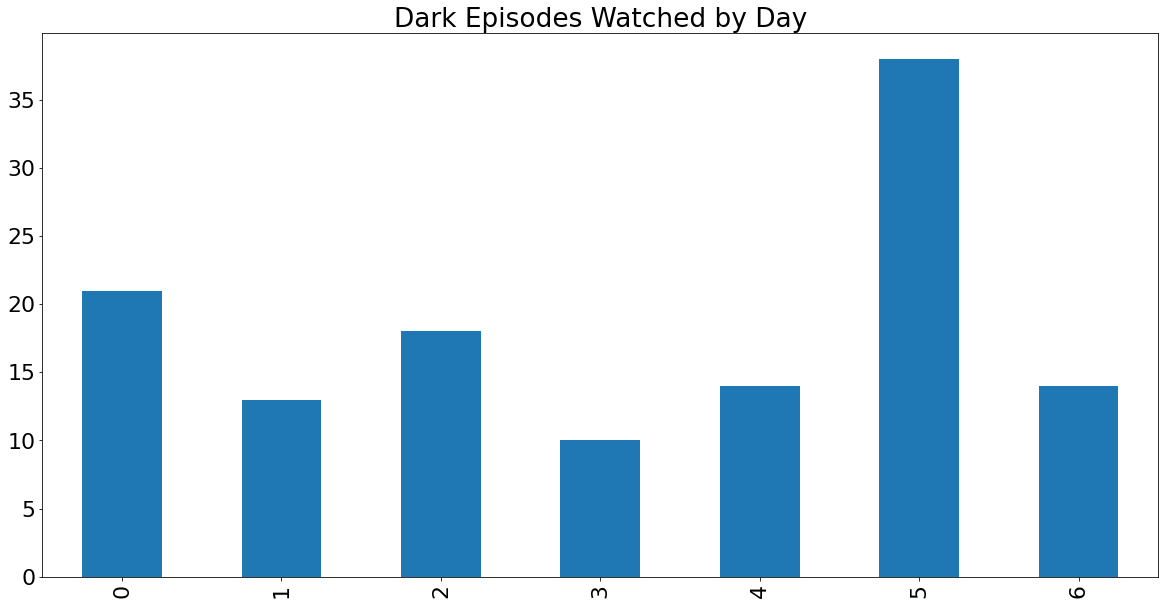

In [ ]:
# Setando variáveis categóricas e definindo pra ser ordenada de forma que aparece de Segunda (0) a Domingo (6)
dark['weekday'] = pd.Categorical(dark['weekday'], categories = [0,1,2,3,4,5,6], ordered=True)

# Criando a df dark_by_day e contando as linhas para cada dia de semana
dark_by_day = dark['weekday'].value_counts()

# ordenando de Segunda (0) a Domingo (6)
dark_by_day = dark_by_day.sort_index()

# Aumentando o tamanho da fonte para ficar mais legível
matplotlib.rcParams.update({'font.size':22})

# Plotando um gráfico de barras com o tamanho e título descritos
dark_by_day.plot(kind='bar', figsize=(20,10), title='Dark Episodes Watched by Day')

## Faz sentido?

Conhecendo meus hábitos, sim. Normalmente assisto Dark nos fins de semana, sábado, principalmente.

### E se analisarmos por hora?

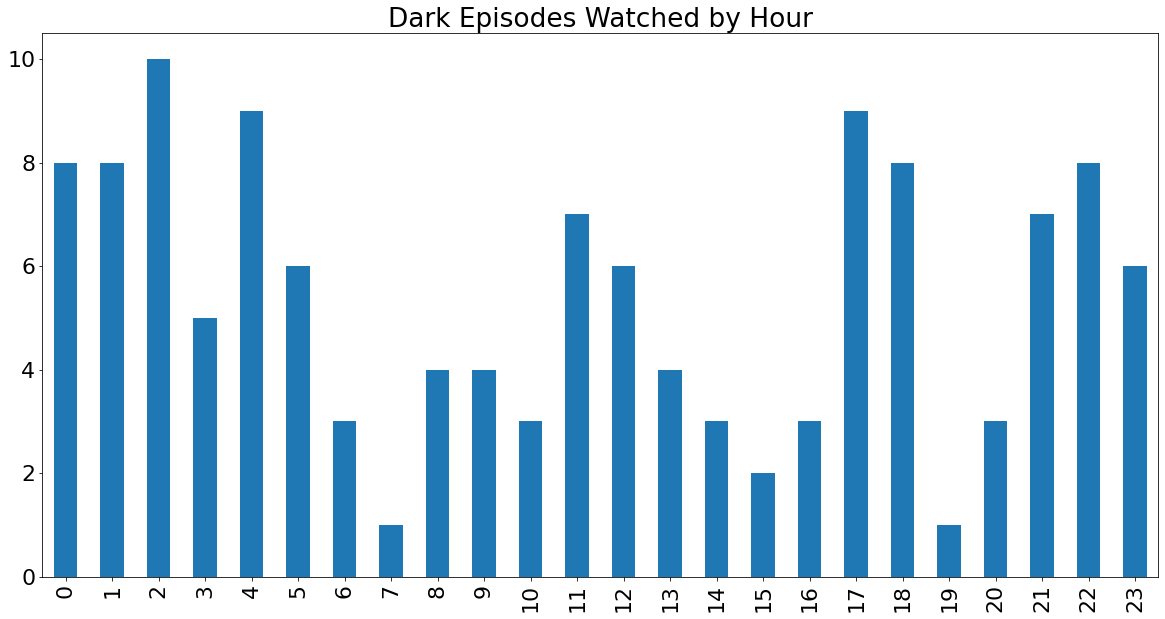

In [ ]:
# Setando variável categórica de horas, plotando de 0 a 23h
dark['hour'] = pd.Categorical(dark['hour'], categories =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# Criando a df dark_by_day e contando as linhas para cada hora
dark_by_hour = dark['hour'].value_counts()

# ordenando de 0 a 23 h
dark_by_hour = dark_by_hour.sort_index()

# Aumentando o tamanho da fonte para ficar mais legível
matplotlib.rcParams.update({'font.size':22})

# Plotando um gráfico de barras com o tamanho e título descritos
dark_by_hour.plot(kind='bar', figsize=(20,10), title='Dark Episodes Watched by Hour')